<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/9%EA%B0%95_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형변환 의한 특징 추출 : 불필요 정보 제거로 핵심 정보만 뽑는 한 기술
$ Y=W^TX=[W^Tx_1,W^Tx_2,...,W^Tx_n] $
$
X = [x_1,x_2,...,x_n] → μ_x(\text{=0 가정,Centering:}X-\mu_x1^T), Σ_x \\
\text{특징 데이터 집합 Y 통계량} \\
\begin{align}
μ_y=\frac{1}{N} \sum_{i=1}^{N} W^Tx_i=W^T\mu_x \\
Σ_y=\frac{1}{N}YY^T=\frac{1}{N}(W^TX)(W^TX)^T=\frac{1}{N}W^T(XX^T)W\frac{1}{N}W^T Σ_x W \\
\end{align}
→ \text{최종 목적 : 다루기 편하기 위해 Y 공분산이 단위행렬 또는 대각행렬로 만듬.(W를 조정)}
$

$
\text{대각행렬 공분산 얻기 위한 선형 변환} \\
Φ → Σ_x \text{고유벡터 행렬}, Λ → Σ_x \text{고유치를 대각원소로 갖는 행렬} \\
Σ_xΦ=ΦΛ(Φ \text{서로 직교},ΦΦ^T=I) → Σ_x=ΦΛΦ^T \\
Σ_y=W^TΣ_xW = W^T(ΦΛΦ^T)W = Λ \\
Y = Φ^TX → W=Φ\text{(Diagonalization Transform)}
$

$
\text{화이트닝 변환(Whitening Transform) : 기존 복잡한 분포 특성 제거
} \\
Σ_z = W^TΣ_yW = (Λ^{-1/2})TΣ_yΛ^{-1/2} = I \\
W = ΦΛ^{-1/2}
$

In [ ]:
import numpy as np
np.random.seed(50)  # 동일한 수열 발생 위해 설정
X = np.array([[1,2,3,4],[6,7,8,9]])
# X = np.array([2,2])
# W = np.array([1,0]) # 1차원
W = np.array([1,1]) # 2차원
W = np.array([1,1]) # 2차원
W.T @ X

array([ 7,  9, 11, 13])

#create dataset with standardizing

In [ ]:
import numpy as np
row_count = 100

In [ ]:
# Class 1
rand_std_1 = np.random.randn(row_count, 3)
mu_1 = np.array([0,0,0])
sigma_1 = np.array([[9,0,3],[0,1,2],[9,0,2]])
class_1 = rand_std_1 @ np.sqrt(sigma_1) + mu_1
class_1.shape

(100, 3)

In [ ]:
# Class 2
rand_std_2 = np.random.randn(row_count, 3)
mu_2 = np.array([0,4,4])
sigma_2 = np.array([[9,0,3],[0,1,2],[9,0,2]])
class_2 = rand_std_2 @ np.sqrt(sigma_2) + mu_2
class_2.shape

(100, 3)

In [ ]:
# Class 3
rand_std_3 = np.random.randn(row_count, 2)
mu_3 = np.array([0,8])
sigma_3 = np.array([[9,0],[0,1]])
class_3 = rand_std_3 @ np.sqrt(sigma_3) + mu_3
class_3.shape

(100, 2)

In [ ]:
class_list = [class_1, class_2]
class_all = np.vstack(class_list)
class_all.shape

(200, 3)

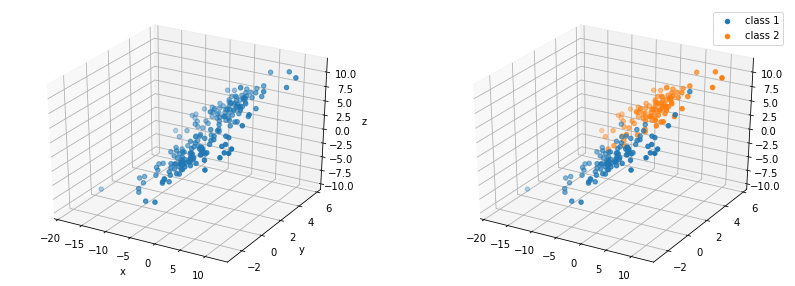

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(class_all[:,0],class_all[:,1],class_all[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(122, projection='3d')
for idx, class_number in enumerate(class_list):
  ax.scatter(class_number[:,0], class_number[:,1], class_number[:,2], label='class {}'.format(idx+1))
plt.legend()
plt.show()

#PCA(Principal Component Analysis) : 선형 변환 기반한 차원 축소


## Centering data

In [ ]:
# Normalizing X
norm_class_all = class_all - class_all.mean(axis=0)
class_all_std = norm_class_all/norm_class_all.std(axis=0)
class_all_std.shape

(200, 3)

##Computing the Eigenvectors and Eigenvalues

In [ ]:
class_all_std_sigma = np.cov(class_all_std.T)
eigen_values, eigen_vectors = np.linalg.eig(class_all_std_sigma)
# eigen_values.shape, eigen_vectors.shape
class_all_std_sigma, eigen_values, eigen_vectors

(array([[1.00502513, 0.04233314, 0.71739496],
        [0.04233314, 1.00502513, 0.72170867],
        [0.71739496, 0.72170867, 1.00502513]]),
 array([2.04401596, 0.96269275, 0.00836667]),
 array([[-5.03774531e-01, -7.09230465e-01, -4.93156537e-01],
        [-5.06565898e-01,  7.04976656e-01, -4.96385843e-01],
        [-6.99715809e-01,  2.50260582e-04,  7.14421251e-01]]))

In [ ]:
import pandas as pd
pd.DataFrame(eigen_vectors.T).to_csv('./eigen_vectors.csv')

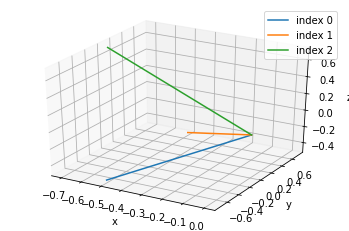

In [ ]:
# matplot
fig = plt.figure()
ax = plt.axes(projection='3d')
for idx in range(eigen_values.shape[0]):
  ax.plot([0,eigen_vectors[idx,0]],[0,eigen_vectors[idx,1]],[0,eigen_vectors[idx,2]], label='index {}'.format(idx))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()

##projection with eigen vector

In [ ]:
# 벡터별 정보 보유율(역순 이유 확인?)
for idx, eigen_value in enumerate(eigen_values):
  print('index {}, rate:{}'.format(idx, eigen_value/sum(eigen_values)*100))

index 0, rate:67.79319608880103
index 1, rate:31.92930951305812
index 2, rate:0.27749439814086424


###2 dimenstion projection 


In [ ]:
projection_matrix = eigen_vectors.T[0:2]
projection_matrix.shape, projection_matrix, 

((2, 3), array([[-5.03774531e-01, -5.06565898e-01, -6.99715809e-01],
        [-7.09230465e-01,  7.04976656e-01,  2.50260582e-04]]))

In [ ]:
projection_matrix.shape, class_all_std.shape

((2, 3), (200, 3))

In [ ]:
projected_matrix = class_all_std @ projection_matrix.T
projected_matrix.shape
# class_all_std[:5], projected_matrix[:5]

(200, 2)

In [ ]:
eigen_values[0:2]

array([2.04401596, 0.96269275])

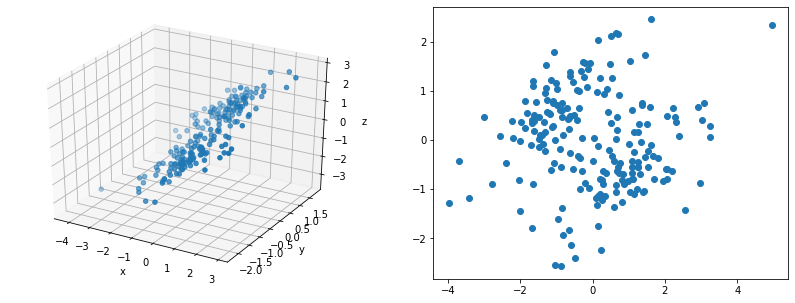

data information rate:99.72250560185914


In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(class_all_std[:,0],class_all_std[:,1],class_all_std[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(122)
ax.scatter(projected_matrix[:,0], projected_matrix[:,1])
plt.show()
print('data information rate:{}'.format(sum(eigen_values[0:2])/sum(eigen_values)*100))